# Data Preparation
> Following is the breif summary of various data types accruired from EOS printer during printing.
The data was provided by AMEXCI AB, Sweden.

![input_data](Input_Data.PNG)

In [1]:
import rawpy
import imageio
import numpy as np
from os import walk
import time
import matplotlib
from matplotlib import pyplot as plt
import cv2  #OpenCV 
import os
import glob
import pandas as pd
import regex as re
import h5py
import imutils #use to rotate images
from keras.preprocessing.image import ImageDataGenerator

__Global Variables__

In [104]:
PB_Path = "D:/UoH_PhD_Exp/Data/Surface_Deformation/Powder_bed_data/"
OT_Path = "D:/UoH_PhD_Exp/Data/Surface_Deformation/OT_data/"
SD_Path = "D:/UoH_PhD_Exp/Data/Surface_Deformation/"

__Reading Images__

In [81]:
def load_all_image_path(img_dir,img_type):
    
    img_labels = []
    for(_, _, filenames) in walk(img_dir):
        img_labels.extend(filenames)
        break
    if(img_type == "jpg"):
        data_path = os.path.join(img_dir,'*g')
        img_dir_path = glob.glob(data_path)
    else:
        data_path = os.path.join(img_dir,'*w')
        img_dir_path = glob.glob(data_path)
    return img_dir_path, img_labels

##### Loading images, both OT and Powder Bed Images, and their paths from hard-drive.

In [82]:
PB_imgs_paths, PB_imgs = load_all_image_path(PB_Path,"jpg")
OT_imgs_paths, OT_imgs = load_all_image_path(OT_Path,"raw")
#OT_test_paths, OT_test_imgs = load_all_image_path(OT_test,"raw")
print(OT_imgs_paths[0])
print(OT_imgs[0])
print("\nTotal number of Powder Bed Images: ", len(PB_imgs))
print("Total number of OT Images: ", len(OT_imgs))

D:/UoH_PhD_Exp/Data/Surface_Deformation/OT_data\110_003_330_Int_32F.raw
110_003_330_Int_32F.raw

Total number of Powder Bed Images:  1022
Total number of OT Images:  501


> The test specimen consisted of 511 layers. Thats why there are 1022 powder bed images, one for laser exposure and one for powder recoating. The optical tomography (OT) images should be 511 but OT datasets is missing 10 images.

## Raw Images

(4000000,)
(2000, 2000)


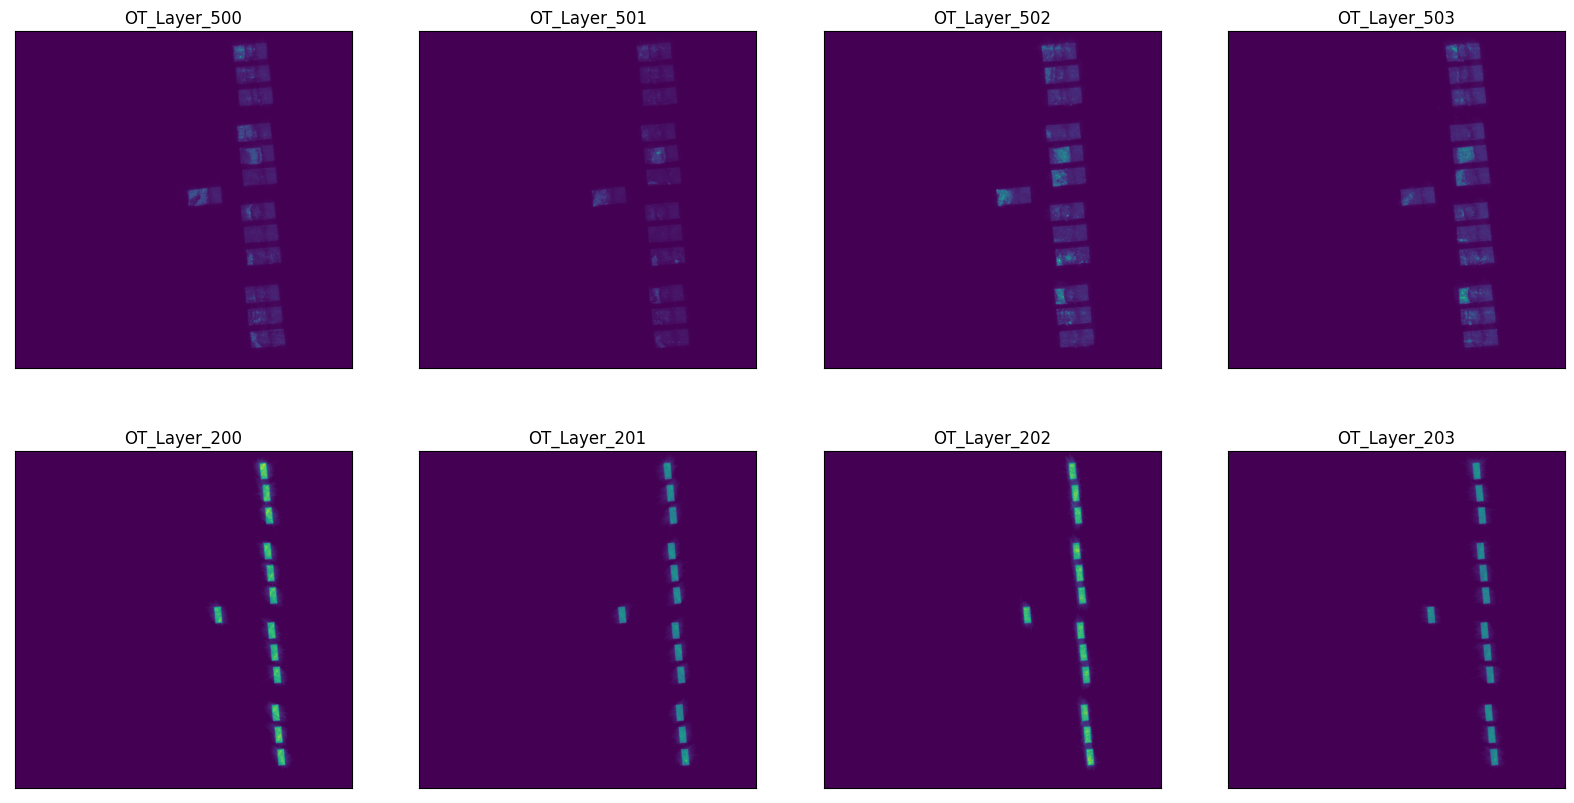

In [83]:
#Reading 4 raw images from the last layers where surface deforamtion occured.
rawfile0 = np.fromfile (os.path.join(OT_Path,'500_015_030_Int_32F.raw'), dtype = np.float32) # read pictures as float32
print(rawfile0.shape)
rawfile0.shape = (2000, 2000)
print(rawfile0.shape)
rawfile1 = np.fromfile (os.path.join(OT_Path,'501_015_060_Int_32F.raw'), dtype = np.float32) # read pictures as float32
rawfile1.shape = (2000, 2000)
rawfile2 = np.fromfile (os.path.join(OT_Path,'502_015_090_Int_32F.raw'), dtype = np.float32) # read pictures as float32
rawfile2.shape = (2000, 2000)
rawfile3 = np.fromfile (os.path.join(OT_Path,'503_015_120_Int_32F.raw'), dtype = np.float32) # read pictures as float32
rawfile3.shape = (2000, 2000)

#Reading 4 raw images from the middle layers where NO surface deforamtion occured.
rawfile4 = np.fromfile (os.path.join(OT_Path,'200_006_030_Int_32F.raw'), dtype = np.float32) # read pictures as float32
rawfile4.shape = (2000, 2000)
rawfile5 = np.fromfile (os.path.join(OT_Path,'201_006_060_Int_32F.raw'), dtype = np.float32) # read pictures as float32
rawfile5.shape = (2000, 2000)
rawfile6 = np.fromfile (os.path.join(OT_Path,'202_006_090_Int_32F.raw'), dtype = np.float32) # read pictures as float32
rawfile6.shape = (2000, 2000)
rawfile7 = np.fromfile (os.path.join(OT_Path,'203_006_120_Int_32F.raw'), dtype = np.float32) # read pictures as float32
rawfile7.shape = (2000, 2000)

test_OT_images =[rawfile0,rawfile1,rawfile2,rawfile3,rawfile4,rawfile5,rawfile6,rawfile7]
test_OT_labels = ["OT_Layer_500","OT_Layer_501","OT_Layer_502","OT_Layer_503",
                  "OT_Layer_200","OT_Layer_201","OT_Layer_202","OT_Layer_203",]

## Display raw images
n = 8 # total number of images
r = 4 #number of images in a row
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(int(n/r),r,i+1),plt.imshow(test_OT_images[i])
    plt.title(test_OT_labels[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [84]:
'''
### -------- Run only once ----------------
for path,img in zip(PB_imgs_paths,PB_imgs):
    print(path)
    print(img)
    ########### Label Image
    tt = img[:-4].split('_')
    print(tt)
    temp_name = tt[1]+"_"+tt[4]+".jpg"
    #print(temp_name)    
    ########### rename image
    img_name = PB_Path +"/"+ temp_name
    print(img_name)
    os.rename(path, img_name)
    #break
'''

'\n### -------- Run only once ----------------\nfor path,img in zip(PB_imgs_paths,PB_imgs):\n    print(path)\n    print(img)\n    ########### Label Image\n    tt = img[:-4].split(\'_\')\n    print(tt)\n    temp_name = tt[1]+"_"+tt[4]+".jpg"\n    #print(temp_name)    \n    ########### rename image\n    img_name = PB_Path +"/"+ temp_name\n    print(img_name)\n    os.rename(path, img_name)\n    #break\n'

In [85]:
'''
for path,img in zip(OT_imgs_paths,OT_imgs):
    print(path)
    print(img)
    ########### Label Image
    temp_name = img[21:]
    print(temp_name)    
    ########### rename image
    img_name = OT_Path +"/"+ temp_name
    print(img_name)
    os.rename(path, img_name)
    #break
'''

'\nfor path,img in zip(OT_imgs_paths,OT_imgs):\n    print(path)\n    print(img)\n    ########### Label Image\n    temp_name = img[21:]\n    print(temp_name)    \n    ########### rename image\n    img_name = OT_Path +"/"+ temp_name\n    print(img_name)\n    os.rename(path, img_name)\n    #break\n'

In [86]:
print(OT_imgs_paths[0:4])
OT_imgs.sort()
print(OT_imgs[0:4])

['D:/UoH_PhD_Exp/Data/Surface_Deformation/OT_data\\110_003_330_Int_32F.raw', 'D:/UoH_PhD_Exp/Data/Surface_Deformation/OT_data\\111_003_360_Int_32F.raw', 'D:/UoH_PhD_Exp/Data/Surface_Deformation/OT_data\\112_003_390_Int_32F.raw', 'D:/UoH_PhD_Exp/Data/Surface_Deformation/OT_data\\113_003_420_Int_32F.raw']
['110_003_330_Int_32F.raw', '111_003_360_Int_32F.raw', '112_003_390_Int_32F.raw', '113_003_420_Int_32F.raw']


## Powder bed images

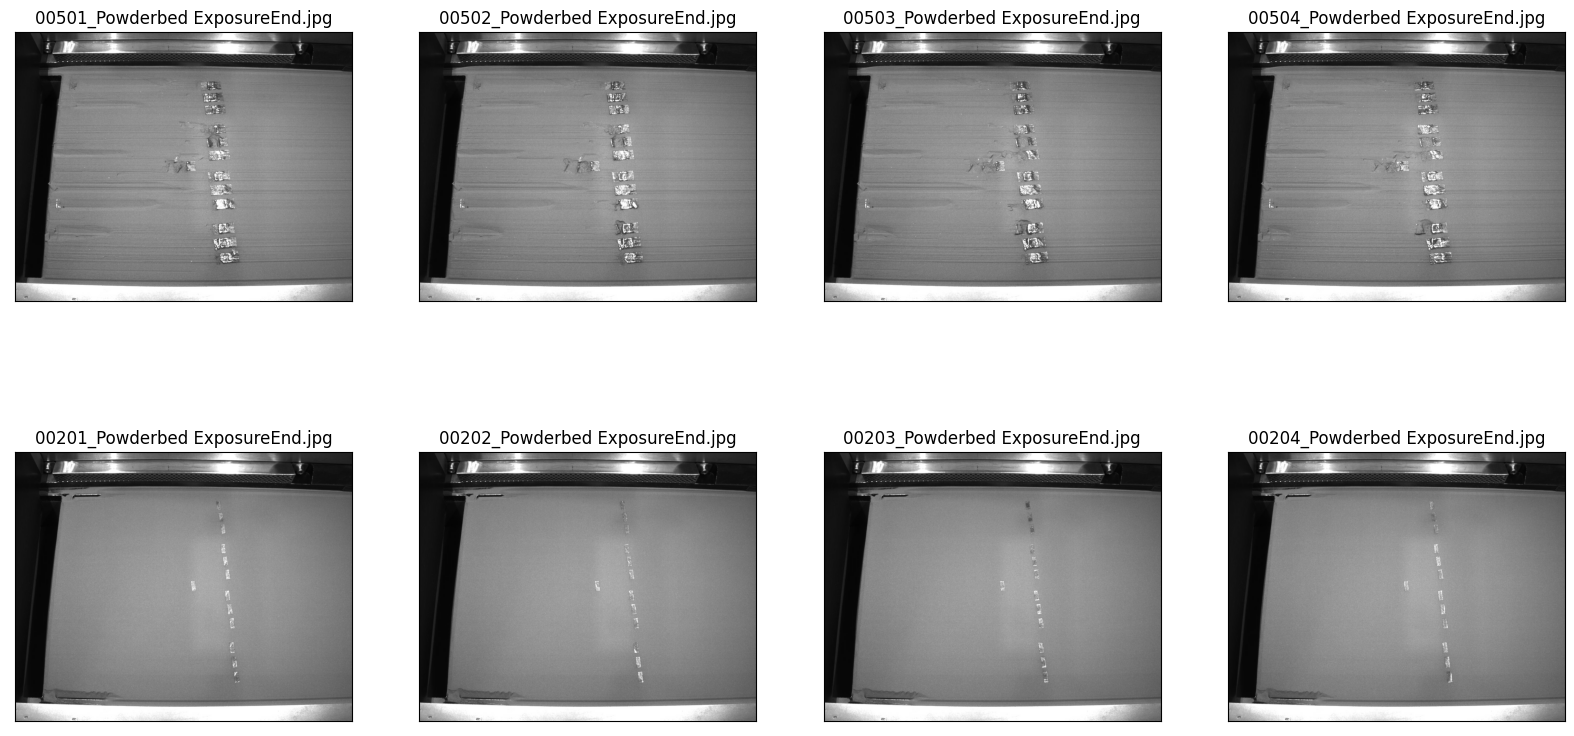

In [87]:
index_list = [1000,1002,1004,1006,400,402,404,406]
test_PB_images =[PB_imgs_paths[i] for i in index_list]
test_PB_labels = [PB_imgs[i] for i in index_list]

## Display raw images
n = 8 # total number of images
r = 4 #number of images in a row
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(int(n/r),r,i+1),plt.imshow(cv2.imread(test_PB_images[i]))
    plt.title(test_PB_labels[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Data accqusition
### Cropping Images

> The PB images from layers 440 to layer number 511 were showing surface deformation and this defects becomes more and more prominent with each successive layer. The layers from 0 to 439 were printed normally. The printed cubes were cropped out of the PB images by the following two function, sub_crop_images and crop_save_images.

In [88]:
df_pb_images = PB_imgs[::2]
df_pb_images_path = PB_imgs_paths[::2]
print("Total powder bed images after laser exposure: ", len(df_pb_images_path))
print("Total powder bed images_paths after laser exposure: ",len(df_pb_images))


Total powder bed images after laser exposure:  511
Total powder bed images_paths after laser exposure:  511


### Image Labelling
__Image Label = SD_Flag + Layer no + cube number + PB_ExposureEND.__
<br><br>
Here SD Flag = 0:No surface deforamtion, 1:surface deforamtion<br>
Layer number = [1:511]<br>
Cube Number  = There are 13 cubes/parts printing simulataniously. We are using 12 cubes/parts for our experiments<br>

In [89]:
def sub_crop_images(img):
    #print(img.shape)
    # Display image
    #plt.imshow(img,'gray')
    #plt.show()
    #crope image
    bar1 = img[0:170, :]
    bar2 = img[170:340, :]
    bar3 = img[360:530, :]
    bar4 = img[560:730, :]
    #display crope images
    test_images = [bar1,bar2,bar3,bar4]
    
    ############################### Displaying images
    #plt.figure(figsize=(10,10))
    #n=4
    #for i in range(n):
    #    plt.subplot(int(n/4),4,i+1),plt.imshow(test_images[i],'gray')
    #plt.show()
        
    return test_images

In [90]:
def crop_save_images(paths, imgs, directory):
    
    for f1,img_name in zip(paths,imgs):
        ########## read image
        #print(f1)
        #print(img_name)
        layer_no = int(img_name.split('_')[0])
        orig_img = cv2.imread(f1)
        orig_img =  imutils.rotate(orig_img, -7)
        #print(orig_img.shape)
        ########### crop image
        temp = orig_img[180:920, 700:900]
        big_crop_imgs = sub_crop_images(temp)

        cube11 = big_crop_imgs[0][14:72, 25:145]
        cube12 = big_crop_imgs[0][60:118, 25:145]
        cube13 = big_crop_imgs[0][103:161, 25:145]
        
        cube21 = big_crop_imgs[1][12:70, 25:145]
        cube22 = big_crop_imgs[1][60:118, 25:145]
        cube23 = big_crop_imgs[1][104:162, 25:145]
        
        cube31 = big_crop_imgs[2][2:60, 25:145]
        cube32 = big_crop_imgs[2][50:108, 25:145]
        cube33 = big_crop_imgs[2][104:162, 25:145]
        
        cube41 = big_crop_imgs[3][0:58, 25:145]
        cube42 = big_crop_imgs[3][50:108, 25:145]
        cube43 = big_crop_imgs[3][104:162, 25:145]
        
        test_images = [cube11,cube12,cube13,cube21,cube22,cube23,cube31,cube32,cube33,cube41,cube42,cube43]
    
        ################## Displaying images
        #plt.figure(figsize=(20,10))
        #n=12
        #for i in range(n):
        #    plt.subplot(n/12,12,i+1),plt.imshow(test_images[i],'gray')
        #plt.show()
        ########################### Storing images
        i=1
        for iimmgg in test_images:
            ########### Label Image
            if (layer_no > 439):
                img_name_temp = "1_"+str(layer_no)+"_cube_"+str(i)+"_PB_ExposureEnd"+".jpg"
            else:
                img_name_temp = "0_"+str(layer_no)+"_cube_"+str(i)+"_PB_ExposureEnd"+".jpg"
            ######### Store Image
            img_name = directory + img_name_temp
            matplotlib.image.imsave(img_name, iimmgg)
            i=i+1

__Create Directories for storing cropped images__

In [91]:
crop_dir = "D:/UoH_PhD_Exp/Data/SD_crop_images/"
if not os.path.exists(crop_dir):
        os.makedirs(crop_dir)

__Remove previous files in the directory__

In [92]:
files = glob.glob(os.path.join(crop_dir,"*"))
for f in files:
    os.remove(f)

__Crop Images__
> We are discarting first 26 layers as the first layers are usually not captured correctly on images due to the reflation from build palte.

In [93]:
df_pb_images_path = df_pb_images_path[25:]
df_pb_images = df_pb_images[25:]
crop_save_images(df_pb_images_path,df_pb_images, crop_dir)

# Datasets

## 1) Origional Imbanaced Dataset

> Here we will create two datasets. The origional data is highly imbaalanced with only a fraction of deformed images. That's why we will create a balanced dataset by up-sampling the minor class, the deformed images, using data augmentations. 

In [101]:
def store_many_hdf5(images, labels, file_path):
    """ Stores an array of images to HDF5.
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    hdf5_dir = file_path
    num_images = len(images)

    # Create a new HDF5 file
    file = h5py.File(hdf5_dir, "w")

    # Create a dataset in the file
    dataset = file.create_dataset(
        "images", np.shape(images), h5py.h5t.STD_U8BE, data=images
    )
    meta_set = file.create_dataset(
        "meta", np.shape(labels), h5py.h5t.STD_U8BE, data=labels
    )
    file.close()

In [99]:
files, labels = load_all_image_path("D:/UoH_PhD_Exp/Data/SD_crop_images/", "jpg")
data = []
imbalanced_df_labels = list()
for f1, lab in zip(files, labels):
    imbalanced_df_labels.append(int(lab[0]))
    img = cv2.imread(f1)
    #print(img.shape)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data.append(gray)    
imbalanced_df_images = np.array(data)

print(len(imbalanced_df_labels))
print(imbalanced_df_images.shape)

(unique, counts) = np.unique(imbalanced_df_labels, return_counts=True)
#print(unique, counts)
print("Total Normal images in origional imbalanced dataset: ", counts[0])
print("Total Deformed images in origional imbalanced dataset: ", counts[1])

5832
(5832, 58, 120)
Total Normal images in origional imbalanced dataset:  4968
Total Deformed images in origional imbalanced dataset:  864


__Store as HDF5 file__

In [107]:
DHF5_Path = "D:/UoH_PhD_Exp/Data/Data_HDF/SD_Imbalanced_Data.h5"
store_many_hdf5(imbalanced_df_images,imbalanced_df_labels, DHF5_Path)

## 2) Re-sampled Balanced Dataset.

## Data Augmentation

> Read only the first 14 layers (layers from 440 to 453) where surface deformation has just started to form. In this manner, we will identify the deformation at an early before it became irreversible. 

In [113]:
import shutil

################## Create directory to store augmented images
aug_dir = "D:/UoH_PhD_Exp/Data/SD_augmented_images/"
if not os.path.exists(aug_dir):
        os.makedirs(aug_dir)
################# Remove previous files from the augmented directory
files = glob.glob(os.path.join(aug_dir,"*"))
for f in files:
    os.remove(f)
################# Generate augmentations

datagen = ImageDataGenerator(        
        horizontal_flip = True,
        vertical_flip = True,
        width_shift_range=0.2,
        height_shift_range=0.1,
        rotation_range=10,
        fill_mode='nearest', #reflect
        )
################## Separate surface deformed images from whole dataset
files, labels = load_all_image_path("D:/UoH_PhD_Exp/Data/SD_crop_images/", "jpg")

data = []
layer_counter = 0 #Take first 14 layers and 12 parts in each layer = 14*12 = 168. Take first 168 defected images.
for f1, lab in zip(files, labels):
    #print(layer_counter)
    if(layer_counter == 168):
        break
    if int(lab[0]) == 1:
        img = cv2.imread(f1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data.append(gray)
        layer_counter+=1
    
SD_defected_images = np.array(data)
print(SD_defected_images[0].shape)
print(SD_defected_images.shape)
print(len(SD_defected_images))

############# Generate augmentations of the first 14 defected layers.
X = SD_defected_images.reshape((SD_defected_images.shape[0], 58, 120, 1))
print(X.shape)

i = 0
for batch in datagen.flow(X, batch_size=24,
                          save_to_dir= r"D:/UoH_PhD_Exp/Data/SD_augmented_images/",
                          save_prefix='dr',
                          save_format='jpg'):    
    i += 1    
    #print(i)
    if i > 100:        
        break

(58, 120)
(168, 58, 120)
168
(168, 58, 120, 1)


In [131]:
################# Load images of layer 201 to 453
print("----------- Layer 201 to 253 cropped images -----------")
files, labels = load_all_image_path("D:/UoH_PhD_Exp/Data/SD_crop_images_layer_201_453/", "jpg")
data = []
imbalanced_df_labels = list()
for f1, lab in zip(files, labels):
    imbalanced_df_labels.append(int(lab[0]))
    img = cv2.imread(f1)
    #print(img.shape)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data.append(gray)    
imbalanced_df_images = np.array(data)

print(len(imbalanced_df_labels))
print(imbalanced_df_images.shape)
(unique, counts) = np.unique(imbalanced_df_labels, return_counts=True)
print("Total Normal images in origional imbalanced dataset: ", counts[0])
print("Total Deformed images in origional imbalanced dataset: ", counts[1])

################# Load augmented images
print("\n ----------- Augmented deformed images -----------")
files, labels = load_all_image_path("D:/UoH_PhD_Exp/Data/SD_augmented_images/", "jpg")
data = []
aug_df_labels = list()
for f1, lab in zip(files, labels):
    aug_df_labels.append(int(1))
    img = cv2.imread(f1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data.append(gray)    
aug_df_images = np.array(data)

print(aug_df_images.shape)
print("Total Augmented images: ", len(aug_df_labels))

############### Combine both dataset to make a balanced dataset
print("\n ----------- Balanced dataset  -----------")
balanced_df_images = np.concatenate((imbalanced_df_images, aug_df_images), axis=0)
balanced_df_labels = imbalanced_df_labels + aug_df_labels

print(len(y))
print(balanced_df_images.shape)
(unique, counts) = np.unique(balanced_df_labels, return_counts=True)
print("Total Normal images in origional imbalanced dataset: ", counts[0])
print("Total Deformed images in origional imbalanced dataset: ", counts[1])

----------- Layer 201 to 253 cropped images -----------
3036
(3036, 58, 120)
Total Normal images in origional imbalanced dataset:  2868
Total Deformed images in origional imbalanced dataset:  168

 ----------- Augmented deformed images -----------
(2424, 58, 120)
Total Augmented images:  2424

 ----------- Balanced dataset  -----------
5460
(5460, 58, 120)
Total Normal images in origional imbalanced dataset:  2868
Total Deformed images in origional imbalanced dataset:  2592


__Store as HDF5 file__

In [127]:
DHF5_Path = "D:/UoH_PhD_Exp/Data/Data_HDF/SD_balanced_Data.h5"
store_many_hdf5(balanced_df_images,balanced_df_labels, DHF5_Path)

# Read DHF5 Files
## 1) Imbalanced dataset

In [128]:
def read_many_hdf5(num_images, file_path):
    """ Reads image from HDF5.
        Parameters:
        ---------------
        num_images   number of images to read

        Returns:
        ----------
        images      images array, (N, 32, 32, 3) to be stored
        labels      associated meta data, int label (N, 1)
    """
    images, labels = [], []

    # Open the HDF5 file
    file = h5py.File(file_path, "r+")

    images = np.array(file["/images"]).astype("uint8")
    labels = np.array(file["/meta"]).astype("uint8")

    return images, labels

In [129]:
############ read Dataset
dir_file_path = "D:/UoH_PhD_Exp/Data/Data_HDF/SD_imbalanced_Data.h5"
X, y = read_many_hdf5(0,dir_file_path)
print("Total X intences: " + str(X.shape))
print("Total y intences: " + str(len(y)))
my_class, my_count = np.unique(y, return_counts=True)
print("Total Normal images in imbalanced dataset: " + str(my_count[0]))
print("Total distorted images in imbalanced dataset: " + str(my_count[1]))

Total X intences: (5832, 58, 120)
Total y intences: 5832
Total Normal images in imbalanced dataset: 4968
Total distorted images in imbalanced dataset: 864


## 2) Balanced dataset

In [130]:
############ read Dataset
dir_file_path = "D:/UoH_PhD_Exp/Data/Data_HDF/SD_balanced_Data.h5"
X, y = read_many_hdf5(0,dir_file_path)
print("Total X intences: " + str(X.shape))
print("Total y intences: " + str(len(y)))
my_class, my_count = np.unique(y, return_counts=True)
print("Total Normal images in balanced dataset: " + str(my_count[0]))
print("Total distorted images in balanced dataset: " + str(my_count[1]))

Total X intences: (5460, 58, 120)
Total y intences: 5460
Total Normal images in balanced dataset: 2868
Total distorted images in balanced dataset: 2592


# Paper visualizations

## 1) Progress of SD in different layers of bar1

In [ ]:
cube11 = cv2.imread("./cropped_images_total/0_100_cube_1_PB_ExposureEnd.jpg")
cube12 = cv2.imread("./cropped_images_total/0_200_cube_1_PB_ExposureEnd.jpg")
cube13 = cv2.imread("./cropped_images_total/0_300_cube_1_PB_ExposureEnd.jpg")
cube21 = cv2.imread("./cropped_images_total/0_400_cube_1_PB_ExposureEnd.jpg")
cube22 = cv2.imread("./cropped_images_total/1_440_cube_1_PB_ExposureEnd.jpg")
cube23 = cv2.imread("./cropped_images_total/1_450_cube_1_PB_ExposureEnd.jpg")
cube31 = cv2.imread("./cropped_images_total/1_460_cube_1_PB_ExposureEnd.jpg")
cube32 = cv2.imread("./cropped_images_total/1_470_cube_1_PB_ExposureEnd.jpg")
cube33 = cv2.imread("./cropped_images_total/1_480_cube_1_PB_ExposureEnd.jpg")
cube41 = cv2.imread("./cropped_images_total/1_490_cube_1_PB_ExposureEnd.jpg")
cube42 = cv2.imread("./cropped_images_total/1_500_cube_1_PB_ExposureEnd.jpg")
cube43 = cv2.imread("./cropped_images_total/1_510_cube_1_PB_ExposureEnd.jpg")

test_images = [cube11,cube12,cube13,cube21,cube22,cube23,cube31,cube32,cube33,cube41,cube42,cube43]
titles = ["100","200","300", "400", "440", "450", "460", "470", "480", "490", "500", "510"]

plt.figure(figsize=(20,10))
n=12
for i in range(n):
    plt.subplot(n/12,12,i+1),plt.imshow(test_images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
img = cv2.imread("00110_Powderbed ExposureEnd.jpg")
#img = cv2.imread(img)
print(img.shape)

## 2) OT vs Powder Bed Images

In [ ]:
rawfiles_temp = ["110_003_330_Int_32F.raw","200_006_030_Int_32F.raw","300_009_030_Int_32F.raw","400_012_030_Int_32F.raw",
            "440_013_230_Int_32F.raw","450_013_530_Int_32F.raw","460_013_830_Int_32F.raw","470_014_130_Int_32F.raw", 
            "480_014_430_Int_32F.raw","490_014_730_Int_32F.raw"]

PB_exposure_files_temp = ["00110_Powderbed ExposureEnd.jpg","00200_Powderbed ExposureEnd.jpg","00300_Powderbed ExposureEnd.jpg",
                    "00400_Powderbed ExposureEnd.jpg","00440_Powderbed ExposureEnd.jpg","00450_Powderbed ExposureEnd.jpg",
                    "00460_Powderbed ExposureEnd.jpg","00470_Powderbed ExposureEnd.jpg","00480_Powderbed ExposureEnd.jpg",
                    "00490_Powderbed ExposureEnd.jpg",]

PB_recoating_files_temp = ["00110_Powderbed RecoatingEnd.jpg","00200_Powderbed RecoatingEnd.jpg","00300_Powderbed RecoatingEnd.jpg",
                     "00400_Powderbed RecoatingEnd.jpg","00440_Powderbed RecoatingEnd.jpg","00450_Powderbed RecoatingEnd.jpg",
                     "00460_Powderbed RecoatingEnd.jpg","00470_Powderbed RecoatingEnd.jpg","00480_Powderbed RecoatingEnd.jpg",
                     "00490_Powderbed RecoatingEnd.jpg",]
#### converting raw files to readable shape.
rawfiles = []
PB_exposure_files = []
PB_recoating_files = []
for raw, expo, recoat in zip(rawfiles_temp, PB_exposure_files_temp, PB_recoating_files_temp):
    temp = np.fromfile(raw, dtype = np.float32)
    #print(temp.shape)
    temp.shape = (2000, 2000)
    #print(temp.shape)
    rawfiles.append(temp)
    
    abc = cv2.imread(expo)
    PB_exposure_files.append(abc)
    
    cba = cv2.imread(recoat)
    PB_recoating_files.append(cba)



test_images = [rawfiles[0], PB_exposure_files[0], PB_recoating_files[0],rawfiles[6], PB_exposure_files[6], PB_recoating_files[6] ]
titles = ["Raw OT layer 100","PB Exposure layer 100","PB Recoating layer 100", "Raw OT layer 460","PB Exposure layer 460","PB Recoating layer 460"]
plt.figure(figsize=(20,10))
n=6
for i in range(n):
    plt.subplot(n/3,3,i+1),plt.imshow(test_images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()